# **EDA**

## Objectives

* To perform exploratory data analysis

## Inputs

* The csv file "pollution_us_2012_2016-population-weather.csv" 

## Outputs

* Various plots (histogram, box plot, scatter plot etc.) to understand the distribution and correlation between variables, along with statistical tests

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [14]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [15]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [17]:
os.chdir(r"c:\Users\sonia\Documents\VS Studio Projects\US_Air_Pollution_Team_2")

os.getcwd()

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

Confirm the new current directory

In [18]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

# Section 1

Section 1 content

Importing libraries and Converting CSV to a Dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import normaltest
import pingouin as pg

In [20]:
df = pd.read_csv('Dataset/EDA/pollution_us_2012_2016-population-weather.csv') # Reading the CSV file
pd.set_option("display.max_columns", None)
df.head()


Address    State County    City  Date Local   NO2 Mean  \
0  400 W RIVER ROAD  Arizona   Pima  Tucson  2012-01-01  17.716667   
1  400 W RIVER ROAD  Arizona   Pima  Tucson  2012-01-02  15.062500   
2  400 W RIVER ROAD  Arizona   Pima  Tucson  2012-01-03  21.643478   
3  400 W RIVER ROAD  Arizona   Pima  Tucson  2012-01-04  25.041668   
4  400 W RIVER ROAD  Arizona   Pima  Tucson  2012-01-05  21.981817   

   NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI   O3 Mean  O3 1st Max Value  \
0               31.0                 0       29  0.013667             0.030   
1               30.6                18       28  0.015083             0.030   
2               31.0                18       29  0.011417             0.026   
3               37.8                10       35  0.009208             0.020   
4               37.1                17       35  0.013042             0.031   

   O3 1st Max Hour  O3 AQI  SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  \
0               10      25  0.254167                0.5                19   
1               10      25  0.200000                0.6                19   
2                9      22  0.295455                0.7                 8   
3               10      17  0.737500                2.1                19   
4                9      26  0.330435                0.8                21   

   SO2 AQI   CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI Population  \
0      0.0  0.336842               0.6                5     7.0    542,649   
1      0.0  0.225000               0.4               23     5.0    542,649   
2      0.0  0.295833               0.4                0     5.0    542,649   
3      3.0  0.345833               0.5               12     6.0    542,649   
4      0.0  0.291667               0.6               23     7.0    542,649   

   Latitude  Longitude  tmax  prcp  wspd  
0   31.9681  -111.7806  26.7   0.0  17.6  
1   31.9681  -111.7806  24.4   0.0  27.4  
2   31.9681  -111.7806  26.1   0.0  10.8  
3   31.9681  -111.7806  24.4   0.0   9.0  
4   31.9681  -111.7806  23.9   0.0   9.7

In [21]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

---

## Descriptive Stats

Below, I will look at the values that help describe the central tendancy and variance of the numerical variables.

In [38]:
df.describe()

Date Local      NO2 Mean  NO2 1st Max Value  \
count                          58158  58158.000000       58158.000000   
mean   2014-02-02 22:19:10.603528192     11.305614          23.425771   
min              2012-01-01 00:00:00     -1.675000          -1.600000   
25%              2013-02-13 00:00:00      5.860870          13.200000   
50%              2014-01-22 00:00:00      9.720833          22.100000   
75%              2015-01-24 00:00:00     15.129167          32.100000   
max              2016-05-31 00:00:00     61.666668         156.900000   
std                              NaN      7.240542          12.605520   

       NO2 1st Max Hour       NO2 AQI       O3 Mean  O3 1st Max Value  \
count      58158.000000  58158.000000  58158.000000      58158.000000   
mean          11.828932     21.796004      0.026215          0.038376   
min            0.000000      0.000000      0.000000          0.000000   
25%            6.000000     12.000000      0.018292          0.028000   
50%            8.000000     21.000000      0.025750          0.037000   
75%           20.000000     30.000000      0.033625          0.047000   
max           23.000000    111.000000      0.078833          0.122000   
std            7.861007     11.931933      0.010918          0.014270   

       O3 1st Max Hour        O3 AQI      SO2 Mean  SO2 1st Max Value  \
count     58158.000000  58158.000000  58158.000000       58158.000000   
mean         10.181420     36.660373      0.927016           2.783574   
min           0.000000      0.000000     -1.725000          -1.300000   
25%           9.000000     25.000000      0.180952           0.600000   
50%          10.000000     33.000000      0.545833           1.300000   
75%          11.000000     43.000000      1.133333           2.900000   
max          23.000000    218.000000     32.800000         211.900000   
std           3.961533     18.976181      1.348149           5.501271   

       SO2 1st Max Hour       SO2 AQI       CO Mean  CO 1st Max Value  \
count      58158.000000  58158.000000  58158.000000      58158.000000   
mean           9.759809      3.350184      0.281135          0.396401   
min            0.000000      0.000000     -0.225000         -0.200000   
25%            5.000000      0.000000      0.183333          0.200000   
50%            9.000000      1.000000      0.237500          0.300000   
75%           15.000000      3.000000      0.347059          0.500000   
max           23.000000    161.000000      3.411111          5.100000   
std            6.755482      7.501521      0.181599          0.295319   

       CO 1st Max Hour        CO AQI    Population      Latitude  \
count     58158.000000  58158.000000  5.815800e+04  58158.000000   
mean          5.891709      4.448090  8.261301e+05     37.120475   
min           0.000000      0.000000  1.070200e+04     28.566600   
25%           0.000000      2.000000  7.177500e+04     33.666400   
50%           1.000000      3.000000  3.029600e+05     37.888600   
75%           9.000000      6.000000  6.789590e+05     40.668400   
max          23.000000     57.000000  8.805594e+06     47.433500   
std           7.834766      3.470456  1.803550e+06      4.250629   

          Longitude          tmax          prcp          wspd          Year  
count  58158.000000  58158.000000  58158.000000  58158.000000  58158.000000  
mean     -95.549943     21.458064      1.612743     11.977109   2013.604388  
min     -123.895100    -22.100000      0.000000      0.000000   2012.000000  
25%     -111.903100     15.000000      0.000000      7.600000   2013.000000  
50%      -93.243000     22.800000      0.000000     10.800000   2014.000000  
75%      -80.015800     29.400000      0.000000     15.200000   2015.000000  
max      -71.092600     48.900000    334.100000     58.300000   2016.000000  
std       16.826353     10.396039      6.993173      6.316803      1.183884

---

In [8]:
# Cell 9: Check for outliers (basic)
df[['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']] = df[['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']].apply(pd.to_numeric, errors='coerce')

In [11]:
# Cell: Detect and count outliers using IQR method

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Function to count outliers per column
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Apply to all numeric columns
outlier_counts = {col: count_outliers_iqr(df, col) for col in numeric_cols}

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.sort_values(by='Outlier Count', ascending=False)


Outlier Count
prcp                       10728
O3 1st Max Hour             8488
SO2 AQI                     6033
SO2 1st Max Value           5331
SO2 Mean                    4434
CO 1st Max Hour             3520
O3 AQI                      3353
CO Mean                     3346
CO 1st Max Value            2680
CO AQI                      2023
wspd                        1682
NO2 Mean                    1506
O3 1st Max Value             655
tmax                         392
O3 Mean                      270
NO2 1st Max Value            264
NO2 AQI                      245
Latitude                       0
Longitude                      0
NO2 1st Max Hour               0
SO2 1st Max Hour               0

## 📊 Bar Chart of Outlier Counts per Numeric Column

This visualization displays the number of outliers detected in each numeric column of a dataset. It's useful for identifying which variables may require cleaning, transformation, or further investigation.



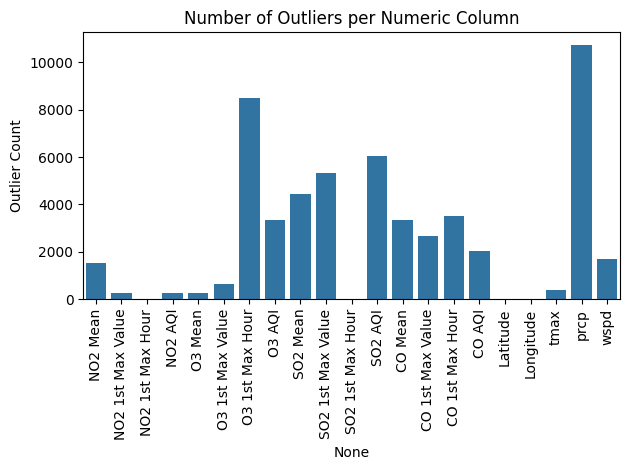

In [12]:
# Bar chart of outlier counts
sns.barplot(x=outlier_df.index, y='Outlier Count', data=outlier_df.reset_index())
plt.xticks(rotation=90)
plt.title('Number of Outliers per Numeric Column')
plt.tight_layout()
plt.show()


---

## Distribution of Numerical Variables

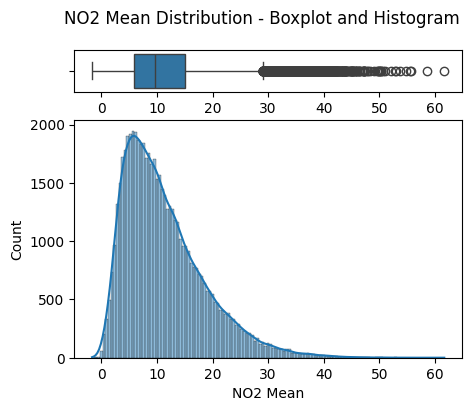

NO2 Mean | Non-outlier range: -8.04 to 29.03
NO2 Mean | skewness: 1.18 | kurtosis: 1.71




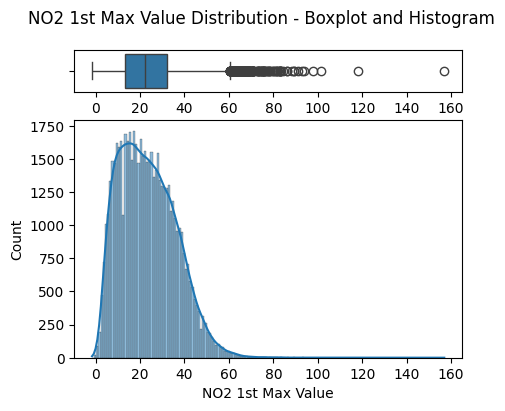

NO2 1st Max Value | Non-outlier range: -15.15 to 60.45
NO2 1st Max Value | skewness: 0.56 | kurtosis: 0.24




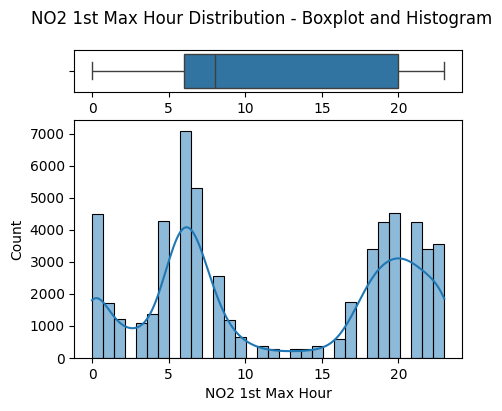

NO2 1st Max Hour | Non-outlier range: -15.0 to 41.0
NO2 1st Max Hour | skewness: 0.04 | kurtosis: -1.58




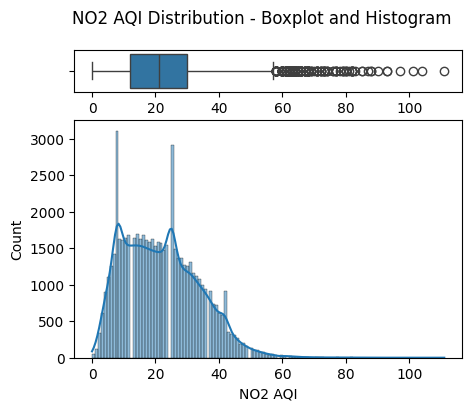

NO2 AQI | Non-outlier range: -15.0 to 57.0
NO2 AQI | skewness: 0.57 | kurtosis: 0.2




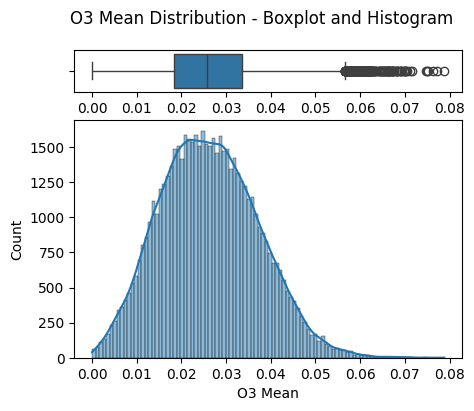

O3 Mean | Non-outlier range: -0.0 to 0.06
O3 Mean | skewness: 0.26 | kurtosis: -0.15




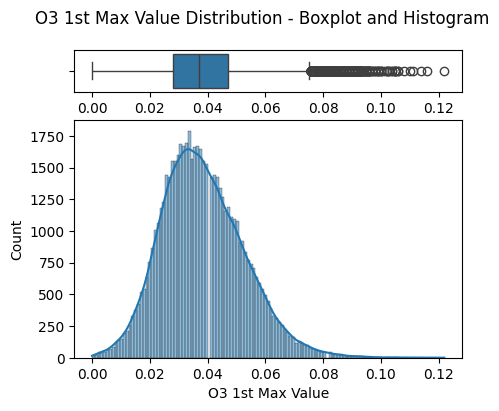

O3 1st Max Value | Non-outlier range: -0.0 to 0.08
O3 1st Max Value | skewness: 0.47 | kurtosis: 0.43




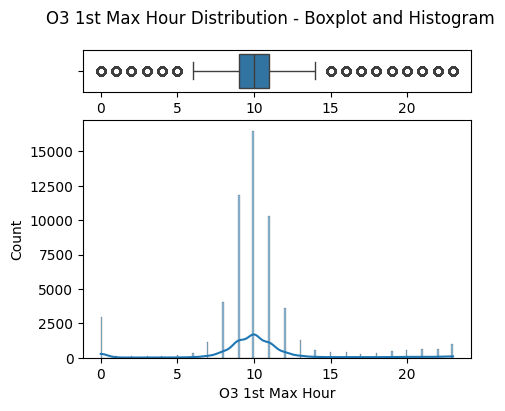

O3 1st Max Hour | Non-outlier range: 6.0 to 14.0
O3 1st Max Hour | skewness: 0.47 | kurtosis: 3.5




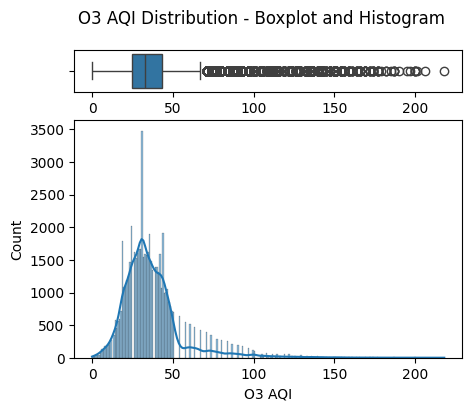

O3 AQI | Non-outlier range: -2.0 to 70.0
O3 AQI | skewness: 2.37 | kurtosis: 9.46




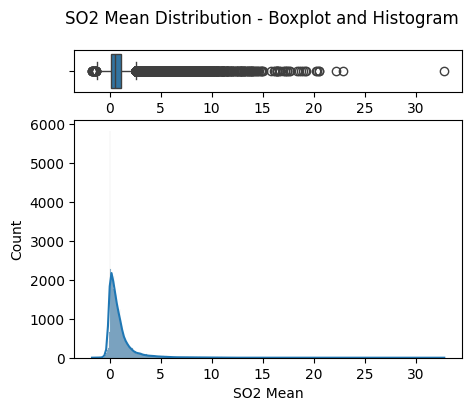

SO2 Mean | Non-outlier range: -1.25 to 2.56
SO2 Mean | skewness: 4.36 | kurtosis: 34.71




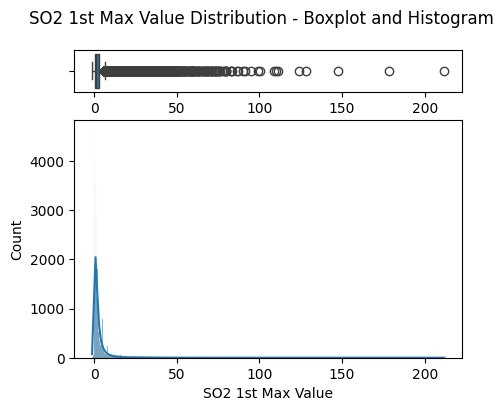

SO2 1st Max Value | Non-outlier range: -2.85 to 6.35
SO2 1st Max Value | skewness: 8.03 | kurtosis: 126.24




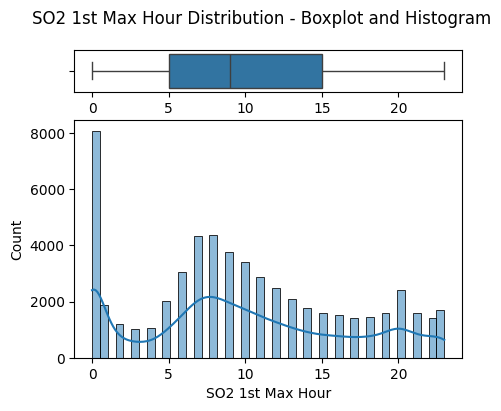

SO2 1st Max Hour | Non-outlier range: -10.0 to 30.0
SO2 1st Max Hour | skewness: 0.25 | kurtosis: -0.88




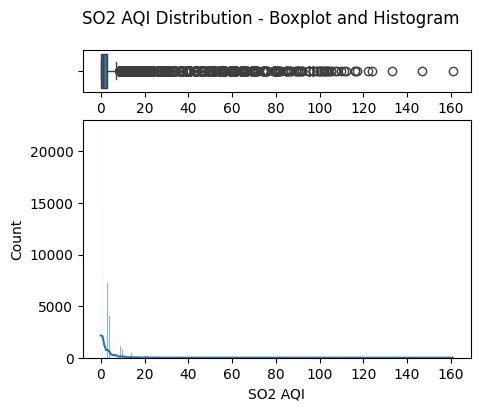

SO2 AQI | Non-outlier range: -4.5 to 7.5
SO2 AQI | skewness: 6.11 | kurtosis: 55.64




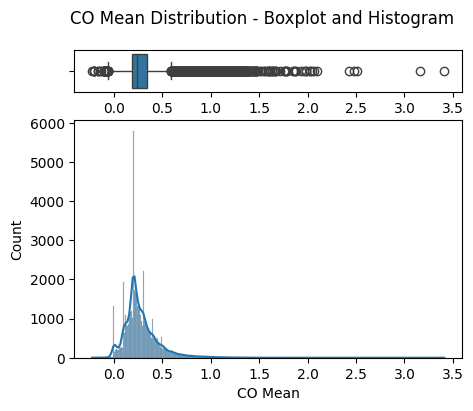

CO Mean | Non-outlier range: -0.06 to 0.59
CO Mean | skewness: 2.14 | kurtosis: 10.84




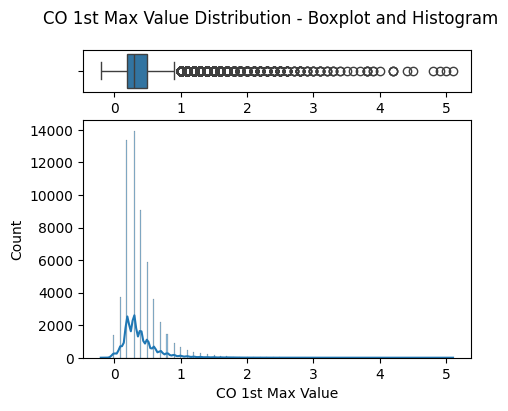

CO 1st Max Value | Non-outlier range: -0.25 to 0.95
CO 1st Max Value | skewness: 3.12 | kurtosis: 19.85




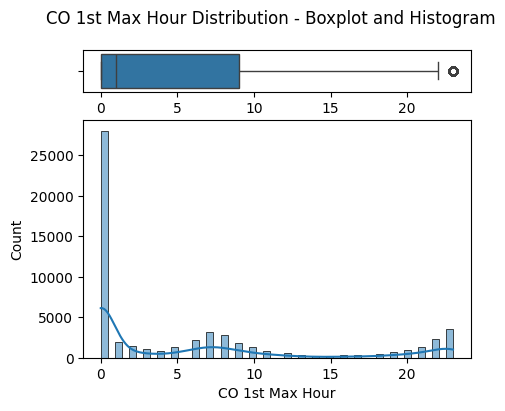

CO 1st Max Hour | Non-outlier range: -13.5 to 22.5
CO 1st Max Hour | skewness: 1.15 | kurtosis: -0.08




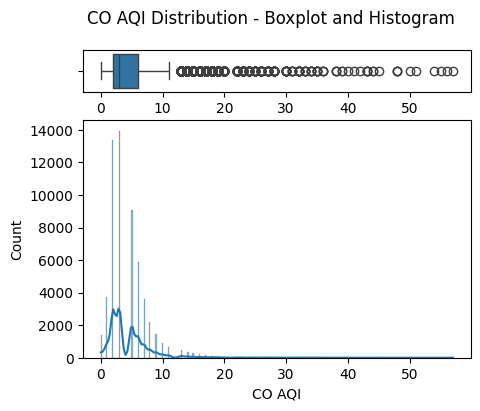

CO AQI | Non-outlier range: -4.0 to 12.0
CO AQI | skewness: 2.83 | kurtosis: 17.04




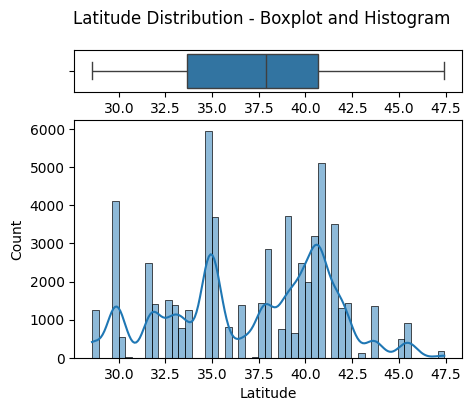

Latitude | Non-outlier range: 23.16 to 51.17
Latitude | skewness: -0.22 | kurtosis: -0.87




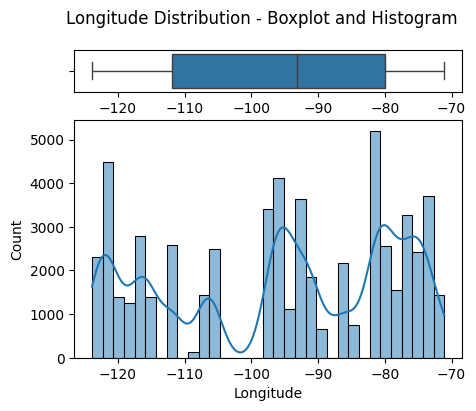

Longitude | Non-outlier range: -159.73 to -32.18
Longitude | skewness: -0.29 | kurtosis: -1.3




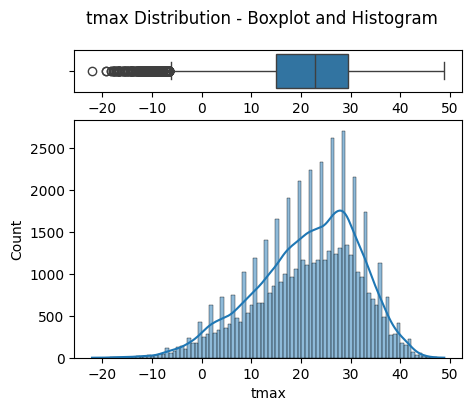

tmax | Non-outlier range: -6.6 to 51.0
tmax | skewness: -0.5 | kurtosis: -0.14




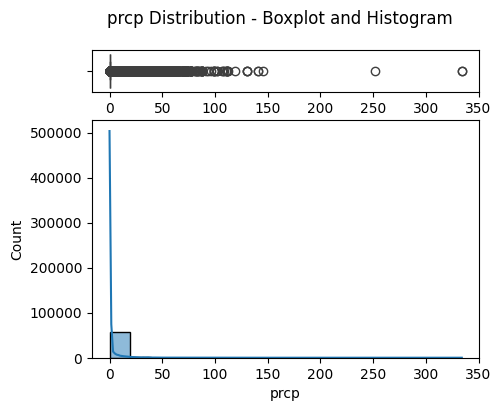

prcp | Non-outlier range: 0.0 to 0.0
prcp | skewness: 10.82 | kurtosis: 265.97




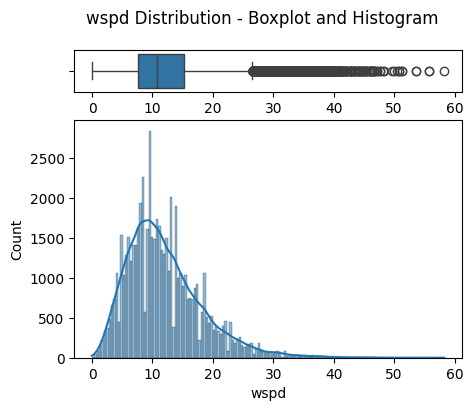

wspd | Non-outlier range: -3.8 to 26.6
wspd | skewness: 1.16 | kurtosis: 2.23




In [13]:
def plot_histogram_and_boxplot(df):
    for col in df.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(5,4), 
                                 gridspec_kw={"height_ratios": (.15, .85)})
        
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[0])
        
        # Histogram
        sns.histplot(data=df, x=col, kde=True, ax=axes[1])
        
        # Title
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Outlier range
        IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
        print(
            f"{col} | Non-outlier range: "
            f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
            f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}"
        )

        # Skewness & Kurtosis just for this column
        print(f"{col} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")
        print("\n")


plot_histogram_and_boxplot(df)

I can see that most of these variables show either some positive ("NO2 Mean", "NO2 1st Max Value", "NO2 AQI", "O3 AQI", "SO2 Mean", "SO2 1st Max Value", "SO2 AQI", "CO Mean", "CO2 1st Max Value", "CO2 AQI", "prcp" and "wspd") or negative ("tmax") skew, with varying levels of kurtosis. The variables "O2 Mean' and "O3 1st Max Value" are close to normally distributed. Transformation of these variables could aid in modelling.

Note, the variables "Latitude", "Longitude" and those for 1st max hour should be ignored as they are not continuous numerical variables.

It interesting to observe the pattern of "1st Max Hour" for each of the pollutants. NO2 looks to peak around 6 - 7 am, which a noticeable dip during main daylight hours. This is the inverse of O3, which peaks during core daylight hours. This makes sense as ozone is formed from the action of sunlight on other gases. Both CO and SO4 peak at midnight (0), although the peak for CO at midnight is much higher (~ 10 x) than at other hours, while it is approximately 1.5 - 5 times as much for SO4. 

Below, I am conducting the D’Agostino and Pearson’s test to confirm deviation from normality. The null hypothesis is that the data is from a normal distribution, while the alternative hypothesis is that it is not. If p < 0.05, I can reject the null hypothesis and accept the alternate, that the data does not come from a normal distribution. The metric "Statistic" is a measure of the deviation from mornal. The greater the value, the greater the deviation.

In [37]:
df_numeric = df.select_dtypes(include='number')

for col in df_numeric.columns:
    stat, p = normaltest(df_numeric[col].dropna())
    print(f"{col}: Statistic={stat:.3f}, p={p:.3f}")

NO2 Mean: Statistic=10985.266, p=0.000
NO2 1st Max Value: Statistic=2755.561, p=0.000
NO2 1st Max Hour: Statistic=294880.407, p=0.000
NO2 AQI: Statistic=2857.489, p=0.000
O3 Mean: Statistic=708.431, p=0.000
O3 1st Max Value: Statistic=2240.505, p=0.000
O3 1st Max Hour: Statistic=6692.350, p=0.000
O3 AQI: Statistic=30429.044, p=0.000
SO2 Mean: Statistic=53779.806, p=0.000
SO2 1st Max Value: Statistic=81173.317, p=0.000
SO2 1st Max Hour: Statistic=7855.556, p=0.000
SO2 AQI: Statistic=67257.885, p=0.000
CO Mean: Statistic=29026.435, p=0.000
CO 1st Max Value: Statistic=41228.213, p=0.000
CO 1st Max Hour: Statistic=8479.398, p=0.000
CO AQI: Statistic=37929.191, p=0.000
Population: Statistic=45103.545, p=0.000
Latitude: Statistic=7320.742, p=0.000
Longitude: Statistic=206811.341, p=0.000
tmax: Statistic=2185.610, p=0.000
prcp: Statistic=96208.115, p=0.000
wspd: Statistic=11597.512, p=0.000
Year: Statistic=14411.657, p=0.000


These results confirm what was seen by histogram. There is high statistical probability that all variables (ignoring "Latitude", "Longitude" and those for 1st max hour) are not normally distributed. 

---

## 📦 Boxplots of Pollutant Distributions

This code generates individual boxplots for each selected pollutant column in the dataset. Boxplots are powerful tools for visualizing the distribution, central tendency, and spread of numeric data, while also highlighting potential outliers.


showing all the distributions by ('NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean)

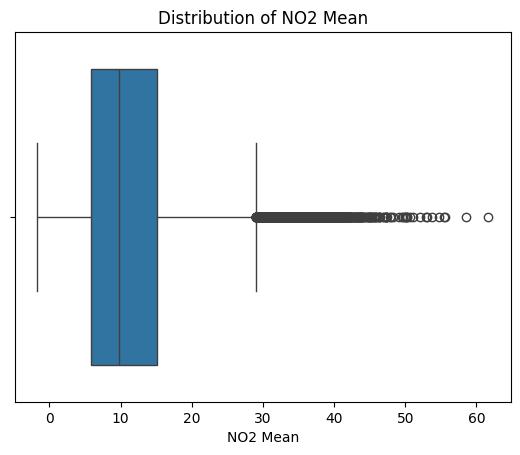

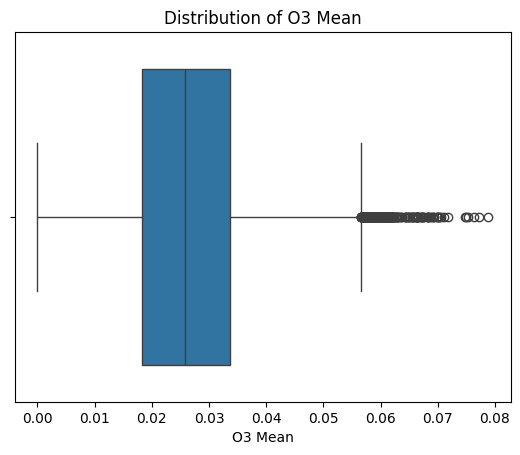

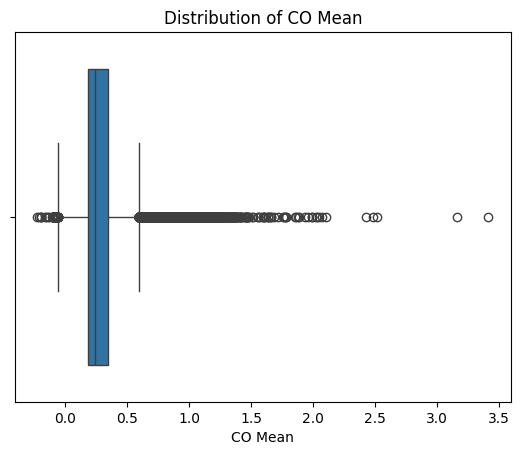

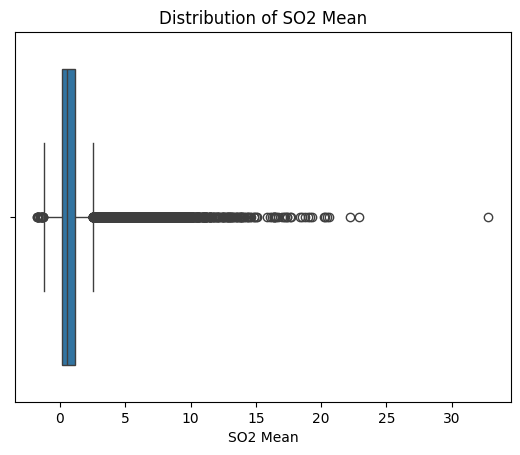

In [21]:
# Cell 10: Boxplots
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']
for col in pollutants:
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


Here, I will compare the medians and variance of the pollutants.

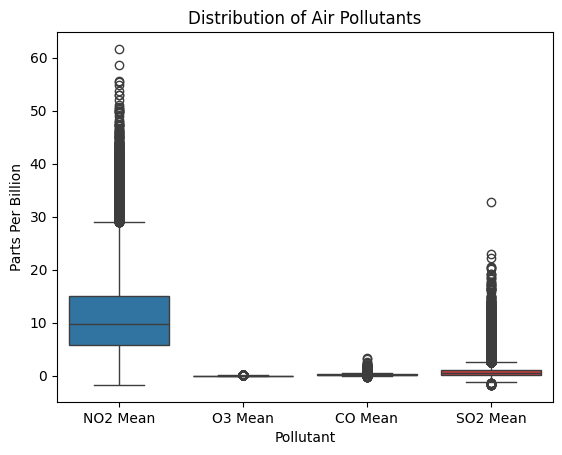

In [ ]:
sns.boxplot(data=df[['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']])
plt.title('Distribution of Air Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Parts Per Billion')
plt.show()

This plots shows that there is the greatest amount of NO2 in the environment. However,it is difficult to assess the other pollutants because of the scaling difference. NO2 has a large variance also.

I will replot the chart without NO2 to see the levels of the other pollutants.

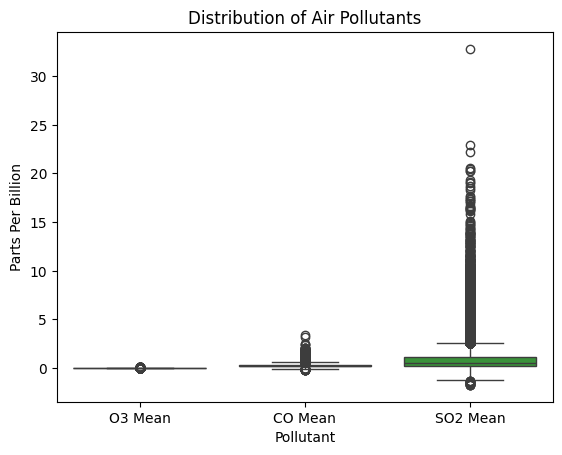

In [ ]:
sns.boxplot(data=df[['O3 Mean', 'CO Mean', 'SO2 Mean']])
plt.title('Distribution of Air Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Parts Per Billion')
plt.show()

This shows that the values for O3 are extremely small (0 - 1), for CO they are 0 - 5 and for SO2, 0 - 35. The variance for SO2 is the far greater than for the others.

---

## Correlations Between Pollutants and AQI Scores

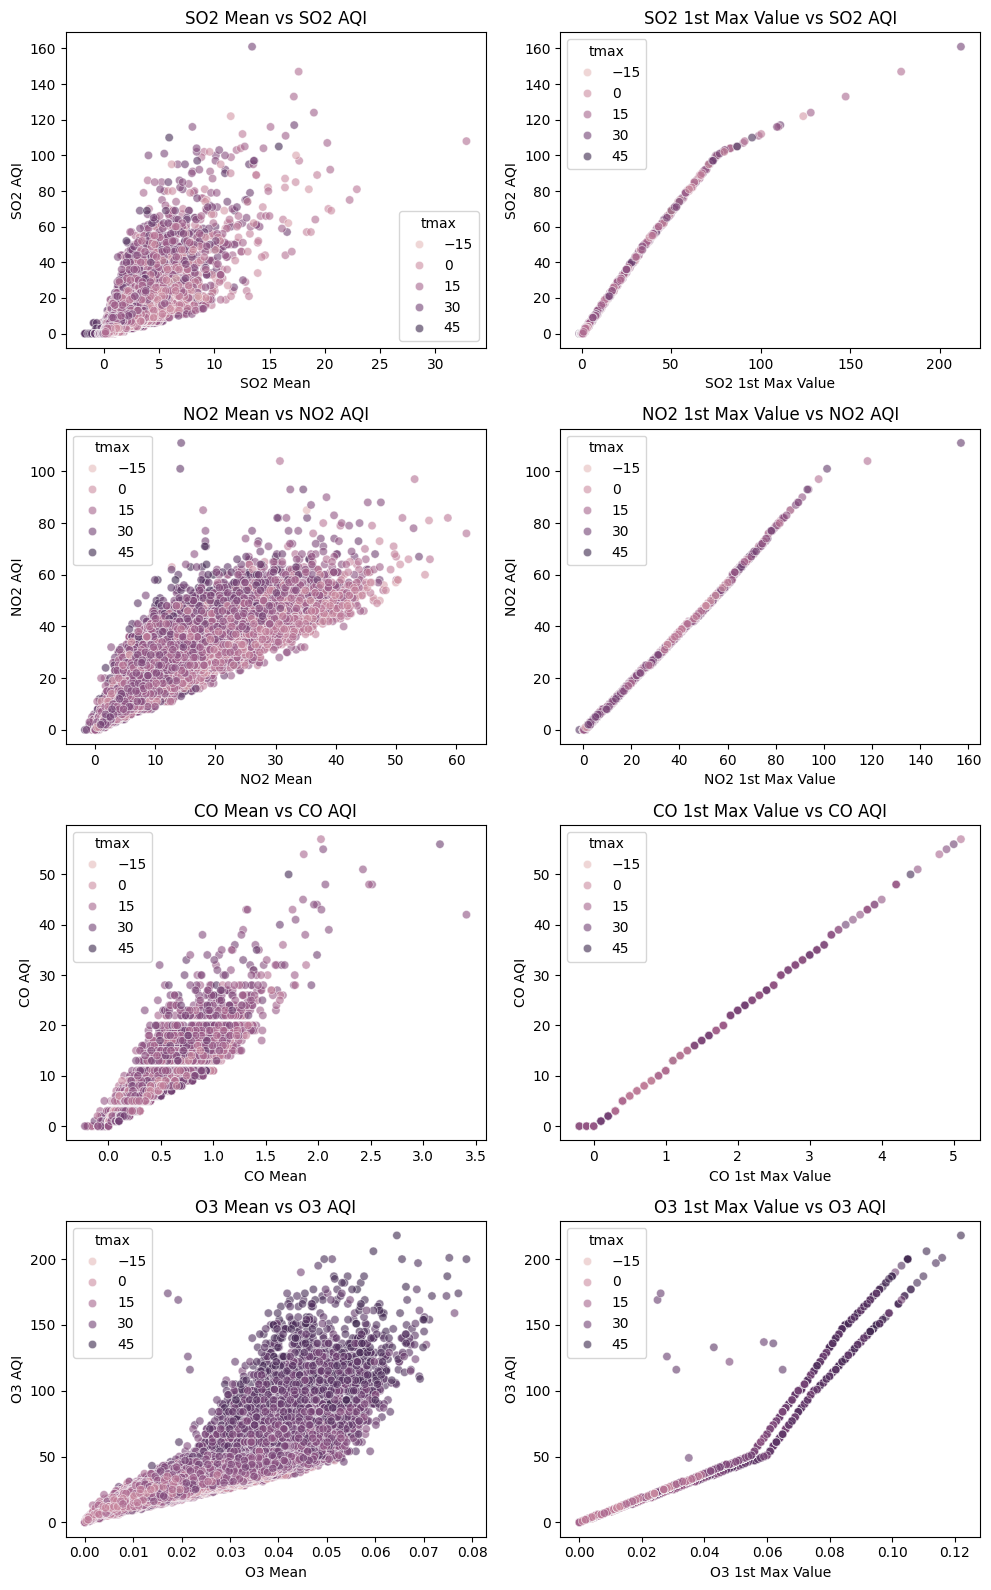

In [11]:
# Define a mapping of y → list of x variables
plot_map = {
    "SO2 AQI": ["SO2 Mean", "SO2 1st Max Value"],
    "NO2 AQI": ["NO2 Mean", "NO2 1st Max Value"],
    "CO AQI": ["CO Mean", "CO 1st Max Value"],
    "O3 AQI": ["O3 Mean", "O3 1st Max Value"]
}

# Count total number of plots
n = sum(len(x_list) for x_list in plot_map.values())
ncols = 2  # since each y has 2 x-variables
nrows = len(plot_map)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

idx = 0
for y_col, x_cols in plot_map.items():
    for x_col in x_cols:
        sns.scatterplot(
            x=x_col,
            y=y_col,
            data=df,
            hue="tmax",
            alpha=0.6,
            ax=axes[idx]
        )
        axes[idx].set_title(f"{x_col} vs {y_col}")
        axes[idx].set_xlabel(x_col)
        axes[idx].set_ylabel(y_col)
        idx += 1

# Hide any unused axes (in case)
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These scatter plots show the correlations between a pollutants mean or highest values and their AQI scores. I can see that each pollutant mean loosely correlatates wiht their AQI score, while first maximum value of a pollutant is almost directly proportional to its AQI score. This is not surprising because the maximum concentration value is used to calculate AQI scores. 

Of interest is the chart for O3, which shows two distinct bands for "O3 1st Max Value" vs "O3 AQI". Consulting with AI, reasons for this could be: changes in measurement or reporting; daytime vs. nighttime or seasonal differences.

Of interest, there apepars to be a relationship between temperature and AQI, with higher AQI values correlating with higher temperatures, a relationship that is not apparent for the other pollutants. However, I can see that both bands in the "O3 1st Max Value" vs "O3 AQI" plot show the same pattern i.e. one band is not indicative of lower or higher temperatures. I believe this suggests that seasonality is unlikely to explain the two bands. 

I believe the possibility that the bands relate to daytime and nighttime readings, or more likely, peak and off-peak sunshine hours (ozone is formed via the action of sunlight) is high. However, I cannot test for this because there is no time information in "Date Local". I also don't have the information to know whether there was a change in measurement or reporting.

---

## Correlations Between Pollutants and Weather

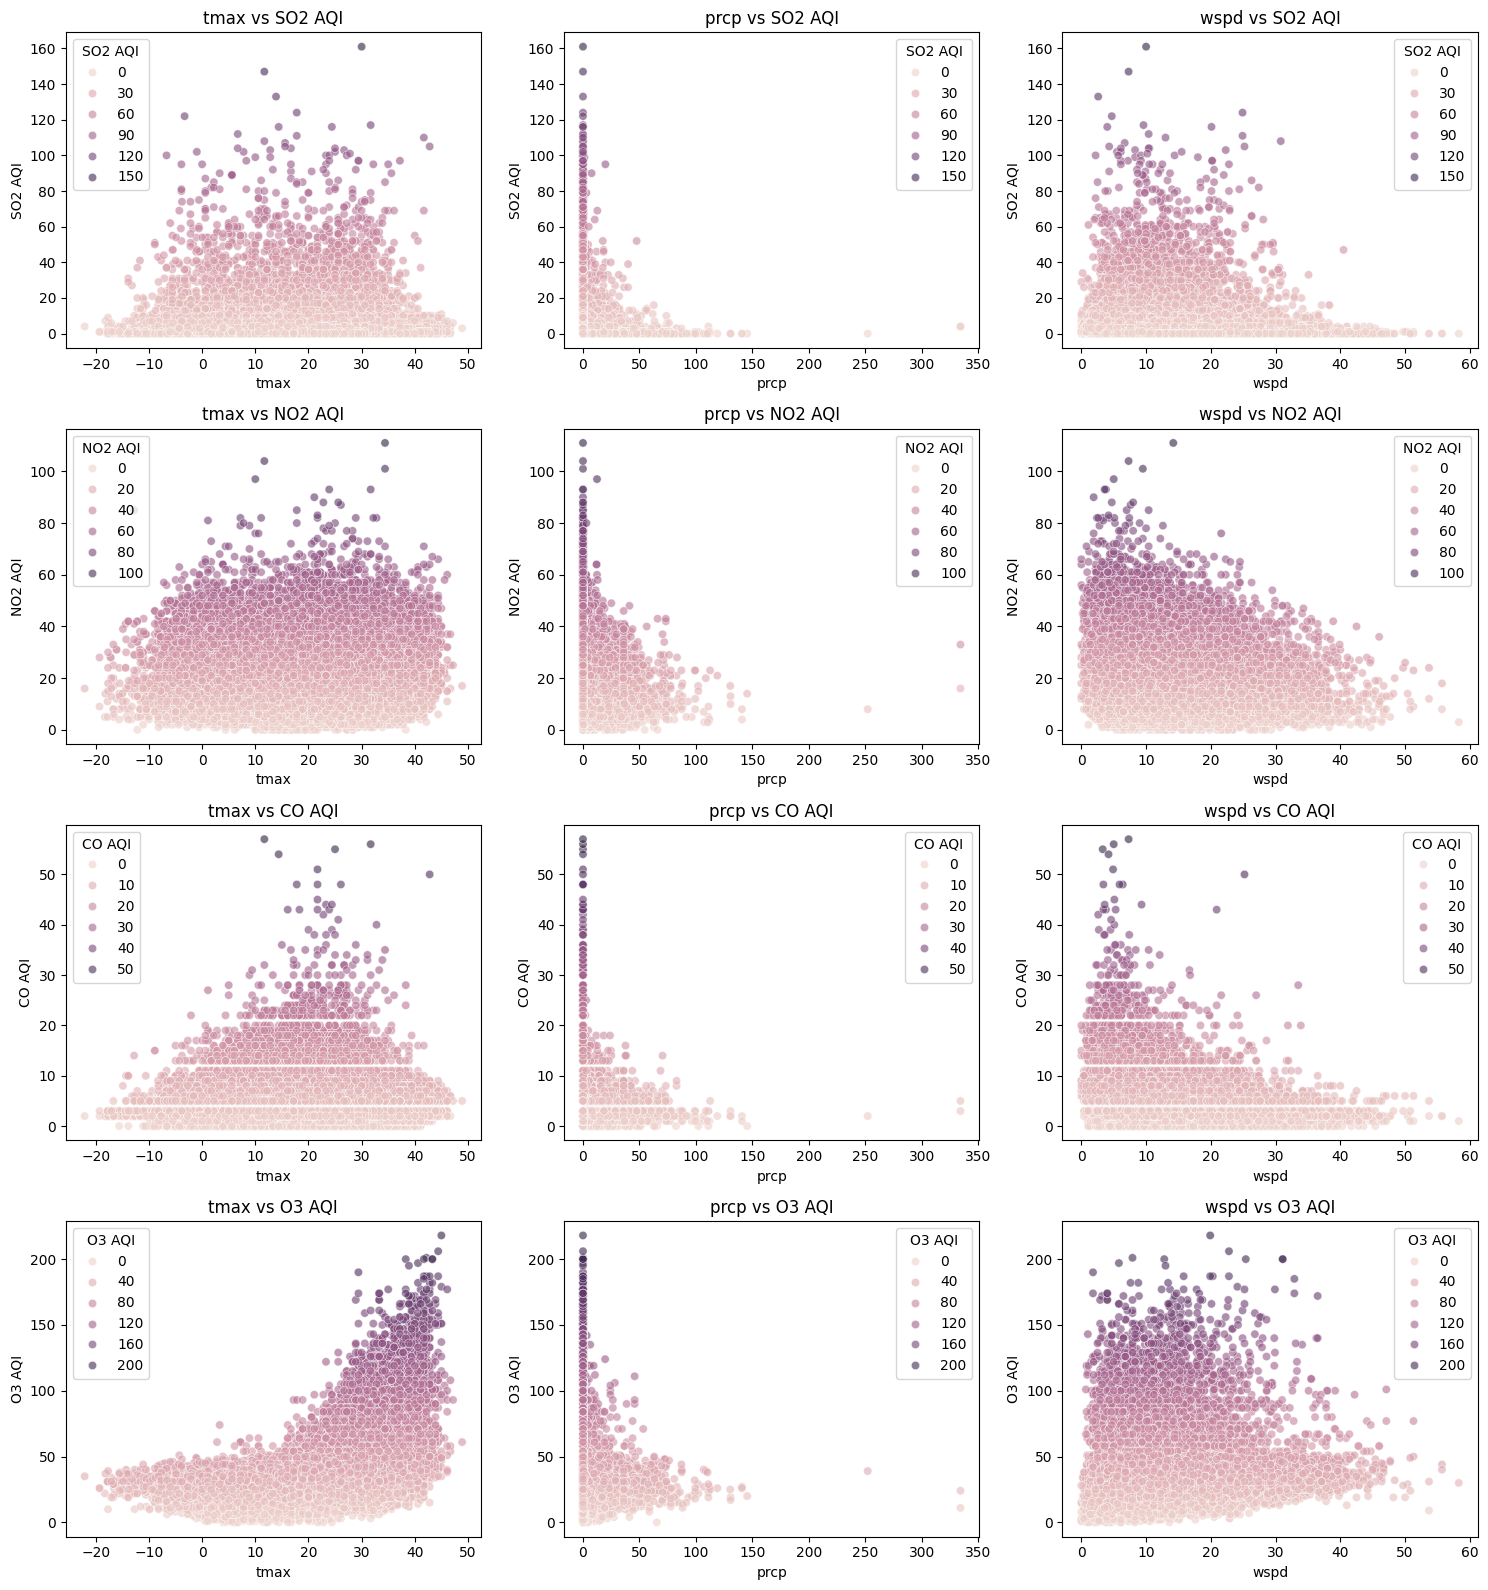

In [10]:
# Define your x and y variable sets
y_cols = ["SO2 AQI", "NO2 AQI", "CO AQI", "O3 AQI"]
x_cols = ["tmax", "prcp", "wspd"]  # 3 x-variables per y

# Calculate total number of plots
n = len(y_cols) * len(x_cols)
ncols = 3  # since 3 x-variables per y
nrows = len(y_cols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

idx = 0
for y_col in y_cols:
    for x_col in x_cols:
        sns.scatterplot(
            x=x_col,
            y=y_col,
            data=df,
            hue=y_col,
            alpha=0.6,
            ax=axes[idx]
        )
        axes[idx].set_title(f"{x_col} vs {y_col}")
        axes[idx].set_xlabel(x_col)
        axes[idx].set_ylabel(y_col)
        idx += 1

# Hide unused subplots if any
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here, I can see how the AQI of a pollutant, which is highly correlated with the first maximum value of the pollutant (above), correlates with maximum temperature, precipitation and wind speed.

Im particular, I find that none of the pollutants' AQI scores show corelation with maximum temperatures, except for O3, as suggested in the charts above. However, this correlation is not directly proportional, rather, as maximum temperatures increase over ~ 15 degrees centigrade, the possibility of a higher AQI score (>50) also increases, but AQI scores of <50 are still very likely. This could suggest another variable (or more), having an efect on AQI scores.

For all pollutants, precipitation can be seen to limit AQI scores. From 0 - 150 mm, AQI scores show an almost exponential decrease. NO2 appears to be least affected by precipitation.

Pollutants are also affected by wind speed to varying degress. CO AQI shows the most prnounced decrease as wind speed > 10 km/ hour. The likelihood of a higher AQI score also decreases with wind speed for NO2, but not as steeply and when wind speed > 20 km/ hour. AQI scores for SO2 decrease precipitously when wind speed > 30 km/ hour, while wind speed appears to slightly increase the AQP score when > 10 km/ hour.

---

## 🧼 Data Cleaning and Date Transformation Steps

These preprocessing steps prepare the dataset for analysis by cleaning population data, converting date formats, and extracting year values for trend analysis.


In [35]:
# Cell 7: Clean 'Population' column
df['Population'] = df['Population'].str.replace(',', '').astype(int)

# Cell 8: Convert 'Date Local' to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'])

# Cell 9: Extract year for trend analysis
df['Year'] = df['Date Local'].dt.year


## 📈 Yearly Average Trends of Pollutants (2011–2016)

This section calculates and visualizes the yearly average concentrations of selected air pollutants. It helps identify long-term trends and supports evidence-based environmental analysis.



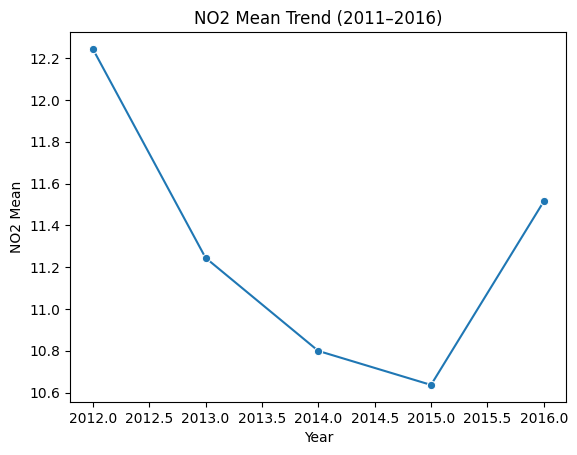

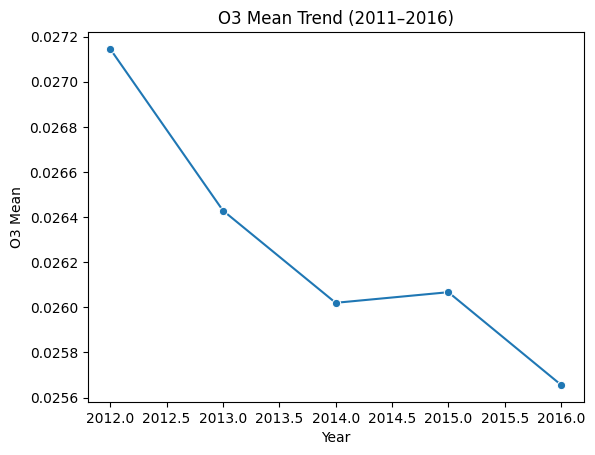

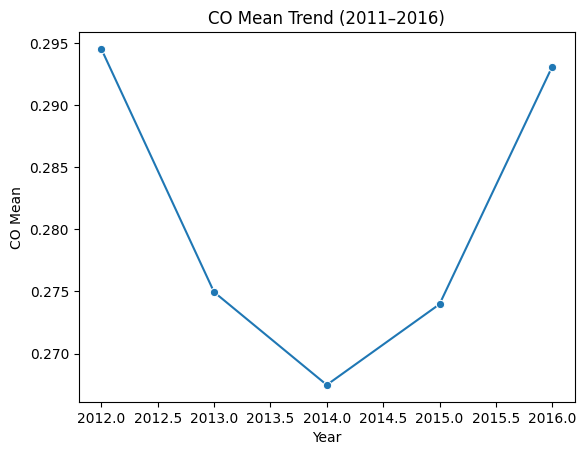

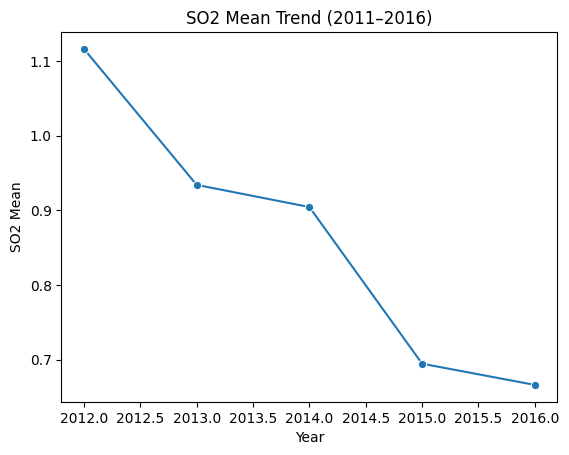

In [13]:
# Cell 13: Yearly average trends
trend_df = df.groupby('Year')[pollutants].mean().reset_index()

# Cell 14: Line plots
for col in pollutants:
    sns.lineplot(data=trend_df, x='Year', y=col, marker='o')
    plt.title(f'{col} Trend (2011–2016)')
    plt.show()


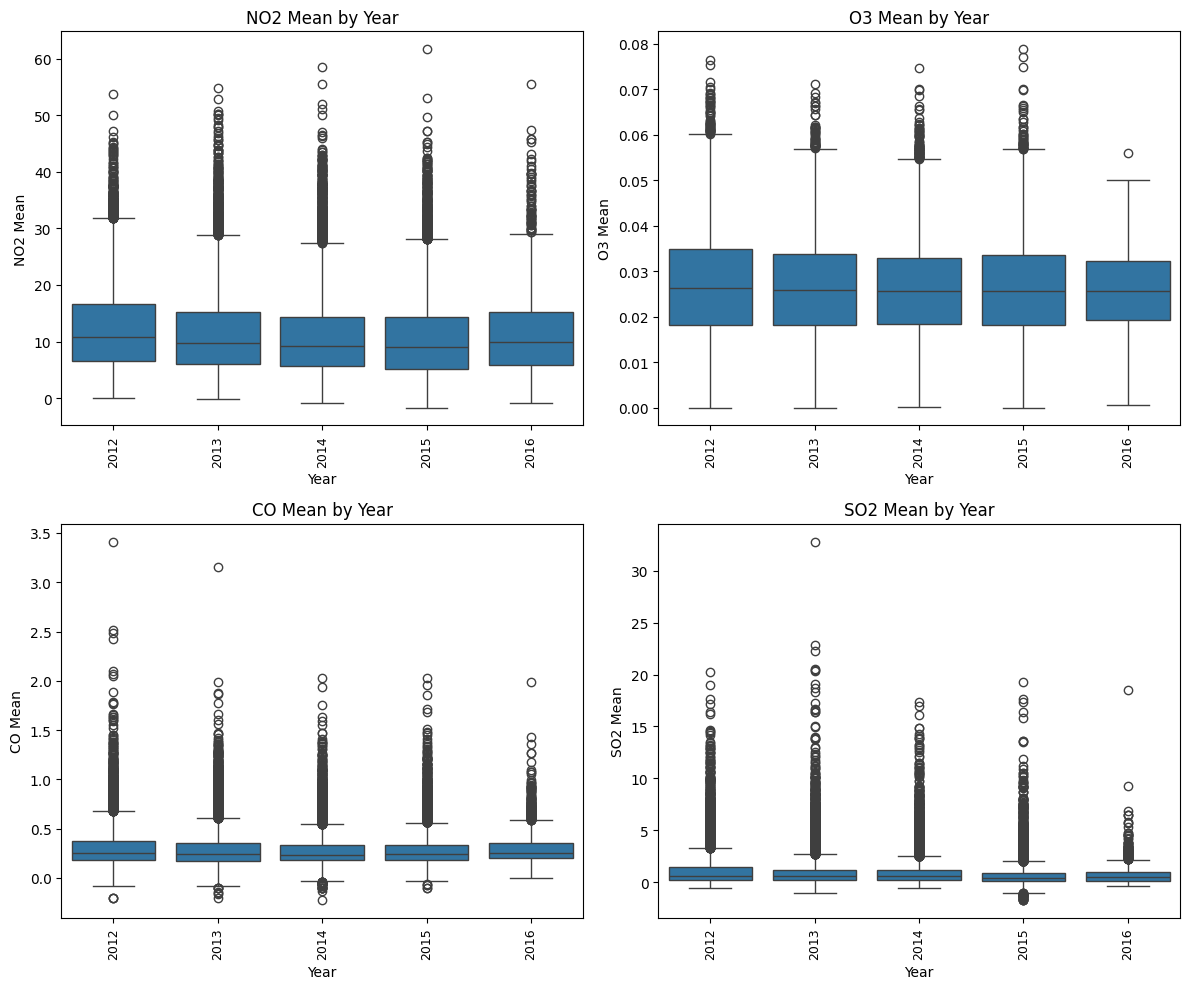

In [38]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Grid size
n = len(pollutants)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(pollutants):
    sns.boxplot(
        x="Year",
        y=col,
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} by Year")
    axes[idx].set_xlabel("Year")
    axes[idx].set_ylabel(col)
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These boxplots show the mean levels of each pollutant by year (2012 - 2016). I can see that they donot change very much, and in general, there appears to be a very small downwards trend for all pollutants.

Below, I will use the non-parametric Kruskal-Wallis test to check for statistical significance between the distributions of pollutant mean values by year. The hull hypothesis is that there are no differences, while the alternate is that there are.

In [36]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Initialize results list
kruskal_results = []

for col in pollutants:
    try:
        # Run Kruskal-Wallis test
        result = pg.kruskal(data=df, dv=col, between="Year")
        
        # Append results with the variable name
        kruskal_results.append({
            'variable': col,
            'H': result['H'].iloc[0],          # test statistic
            'pval': result['p-unc'].iloc[0]    # p-value
        })
    except Exception as e:
        print(f"Could not run Kruskal-Wallis for {col}: {e}")
        kruskal_results.append({
            'variable': col,
            'H': None,
            'pval': None
        })

# Convert results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='pval').reset_index(drop=True)

kruskal_df

variable           H           pval
0  SO2 Mean  829.006777  3.999818e-178
1  NO2 Mean  515.391299  3.140440e-110
2   CO Mean  160.281699   1.272069e-33
3   O3 Mean   46.372898   2.059801e-09

As p < 0.05 for all pollutants, I can accept the alternate hypothesis; the distribution of pollutants vary significantly by year. 

---

## Pollutant Levels by State

The code below will compare each mean pollutant level by state, using box plots.

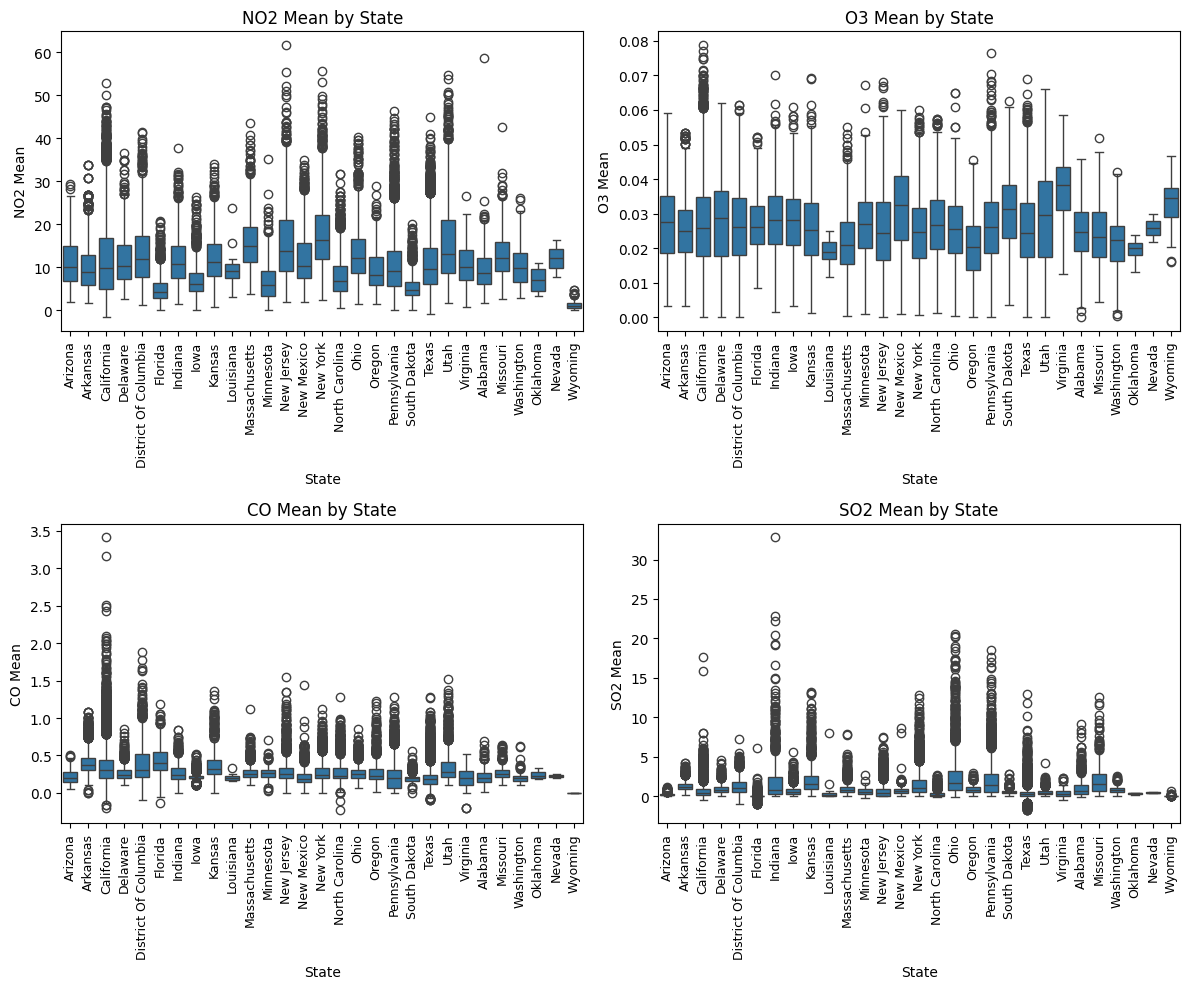

In [26]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Grid size
n = len(pollutants)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(pollutants):
    sns.boxplot(
        x="State",
        y=col,
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} by State")
    axes[idx].set_xlabel("State")
    axes[idx].set_ylabel(col)
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From these plots, I can see a lot of variation in mean pollutant by State. For NO2, Wyoming, Florida and South Dakota have the lowest median values, while New York and New Jersey have the highest. 

For O3, Luisiana and Oklahoma have the lowest while Virginia has the highest, however, many states show lots of variance and have values that are often higher than Virginia's. 

For CO, Wyoming has the lowest values while Florida has the highest median. However, California has the highest variance with numerous values higher than the other states.

For SO4, it's quite hard to tell which state has the lowest median value, but Indiana, Ohio and Pensylvania all have some of the highest median values.

Below, I will use the non-parametric Kruskal-Wallis test to check for statistical significance between the distributions of pollutant mean values between states. The hull hypothesis is that there are no differences, while the alternate is that there are.

In [33]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Initialize results list
kruskal_results = []

for col in pollutants:
    try:
        # Run Kruskal-Wallis test
        result = pg.kruskal(data=df, dv=col, between="State")
        
        # Append results with the variable name
        kruskal_results.append({
            'variable': col,
            'H': result['H'].iloc[0],          # test statistic
            'pval': result['p-unc'].iloc[0]    # p-value
        })
    except Exception as e:
        print(f"Could not run Kruskal-Wallis for {col}: {e}")
        kruskal_results.append({
            'variable': col,
            'H': None,
            'pval': None
        })

# Convert results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='pval').reset_index(drop=True)

kruskal_df

variable             H  pval
0  NO2 Mean   9469.010407   0.0
1   O3 Mean   1666.662762   0.0
2   CO Mean  11337.602946   0.0
3  SO2 Mean  18244.694229   0.0

These results show p < 0.05, therefore I can accept the alternate hypothesis; pollutant means vary statistically by State.

---

## 🌡️🔗 Correlation Heatmap: Weather vs Pollution

This visualization shows the pairwise correlation between selected weather variables and pollutant concentrations. It helps identify potential relationships that may influence air quality patterns.


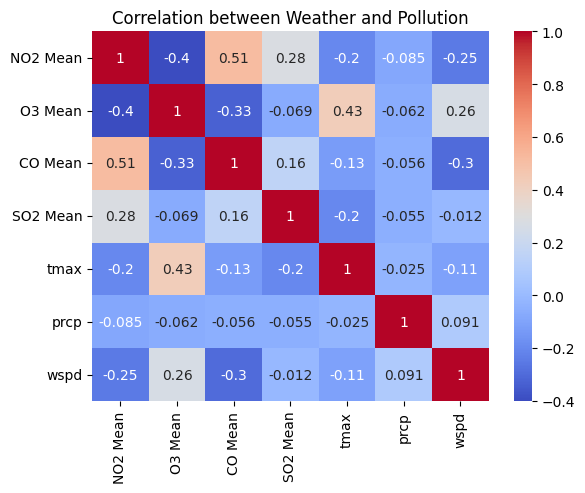

In [14]:
# Cell 15: Correlation heatmap
weather_vars = ['tmax', 'prcp', 'wspd']
corr_df = df[pollutants + weather_vars].corr()

sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation between Weather and Pollution')
plt.show()


In [15]:
import plotly.express as px
import plotly.graph_objects as go


# 🧪 Environmental Data Analysis Pipeline

This workflow performs a comprehensive analysis of air pollution and weather data, including data cleaning, outlier detection, correlation analysis, time series visualization, and hypothesis testing. Each step is designed to support both technical exploration and stakeholder communication.


(53436, 25)
Address                      object
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
Population                    int32
Latitude                    float64
Longitude                   float64
tmax                        float64
prcp                        float64
wspd                        float64
Year                          int32
dtype: object
            Address    State County    City Date Local   NO2 Mean  \
0  40

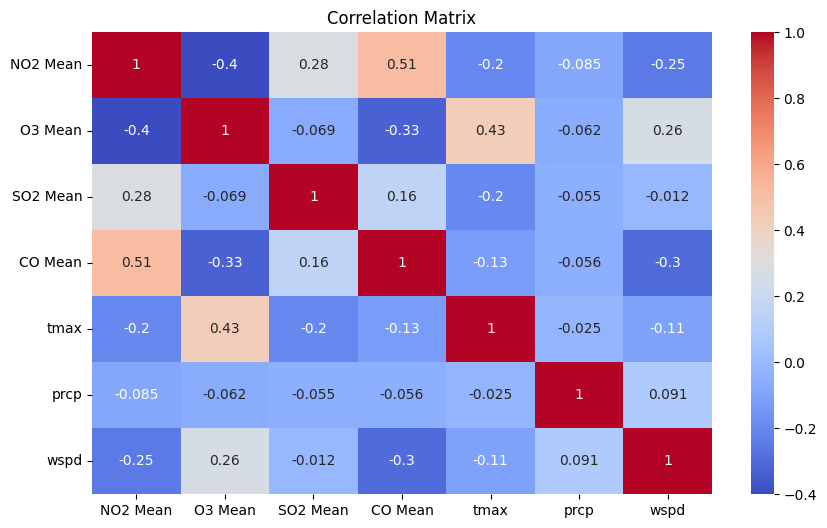

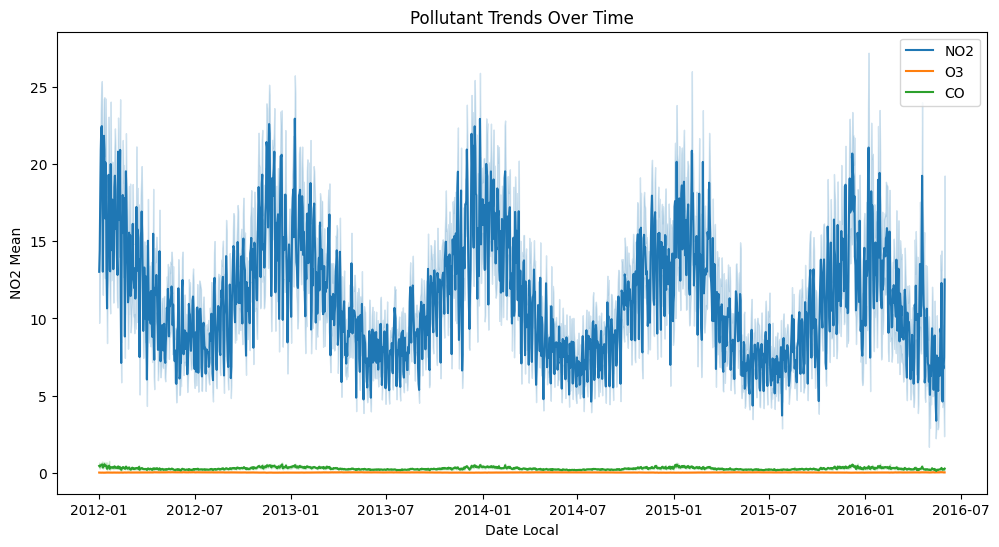

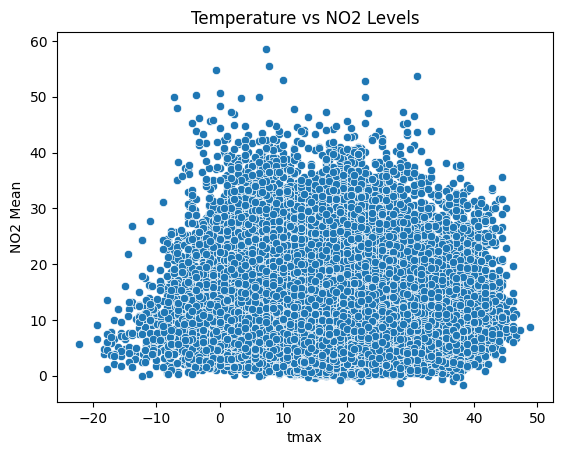

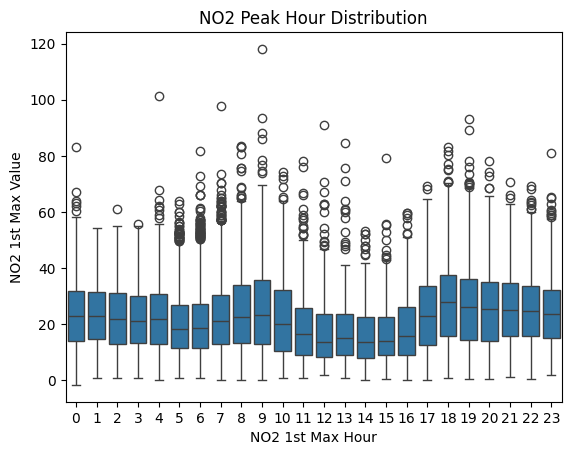

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Overview
print(df.shape)
print(df.dtypes)
print(df.head())

# 2. Missing Values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# 3. Data Types and Conversion
df['Date Local'] = pd.to_datetime(df['Date Local'])

# 4. Descriptive Statistics
print(df.describe())

# 5. Outlier Detection (IQR method)
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers

outlier_cols = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'tmax', 'wspd']
for col in outlier_cols:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers")

# 6. Correlation Analysis
corr = df[['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'tmax', 'prcp', 'wspd']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 7. Time Series Trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date Local', y='NO2 Mean', label='NO2')
sns.lineplot(data=df, x='Date Local', y='O3 Mean', label='O3')
sns.lineplot(data=df, x='Date Local', y='CO Mean', label='CO')
plt.title("Pollutant Trends Over Time")
plt.legend()
plt.show()

# 8. Hypothesis Testing (example: temp vs NO2)
sns.scatterplot(data=df, x='tmax', y='NO2 Mean')
plt.title("Temperature vs NO2 Levels")
plt.show()

# Optional: Hourly patterns
sns.boxplot(data=df, x='NO2 1st Max Hour', y='NO2 1st Max Value')
plt.title("NO2 Peak Hour Distribution")
plt.show()


## final steps in EDA

Temporal patterns (trends over time)

Correlation analysis

Pollution vs. weather relationships

AQI distribution

Outlier detection


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58158 entries, 0 to 58157
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Address            58158 non-null  object        
 1   State              58158 non-null  object        
 2   County             58158 non-null  object        
 3   City               58158 non-null  object        
 4   Date Local         58158 non-null  datetime64[ns]
 5   NO2 Mean           58158 non-null  float64       
 6   NO2 1st Max Value  58158 non-null  float64       
 7   NO2 1st Max Hour   58158 non-null  int64         
 8   NO2 AQI            58158 non-null  int64         
 9   O3 Mean            58158 non-null  float64       
 10  O3 1st Max Value   58158 non-null  float64       
 11  O3 1st Max Hour    58158 non-null  int64         
 12  O3 AQI             58158 non-null  int64         
 13  SO2 Mean           58158 non-null  float6

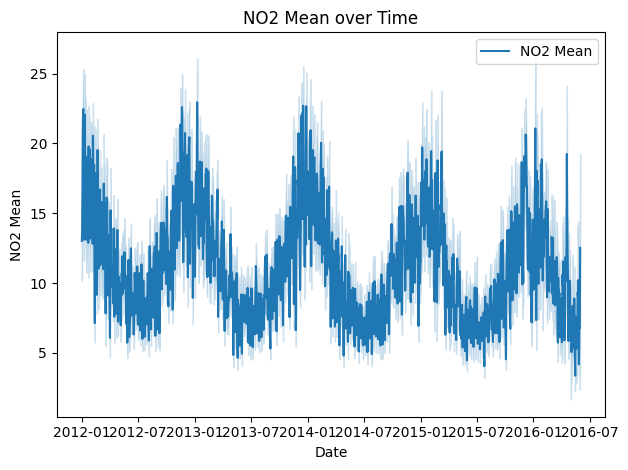

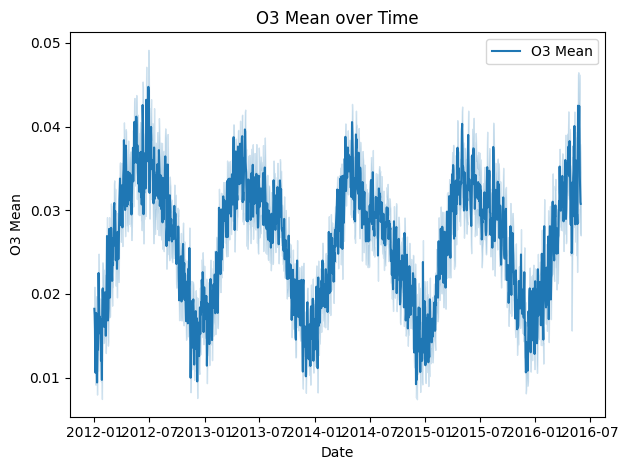

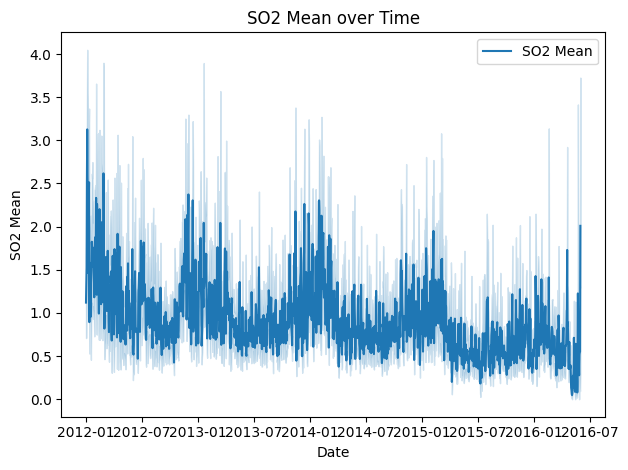

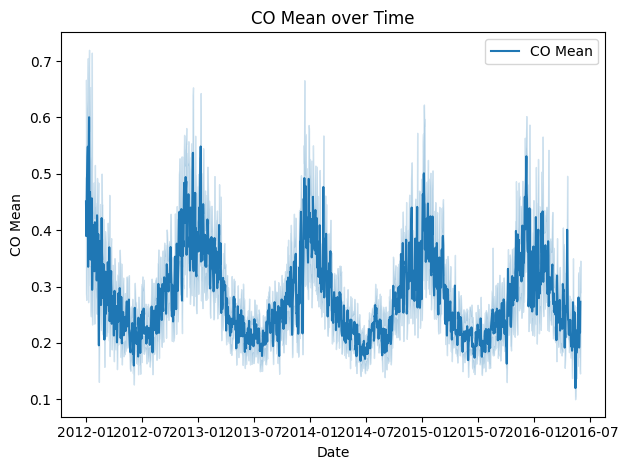

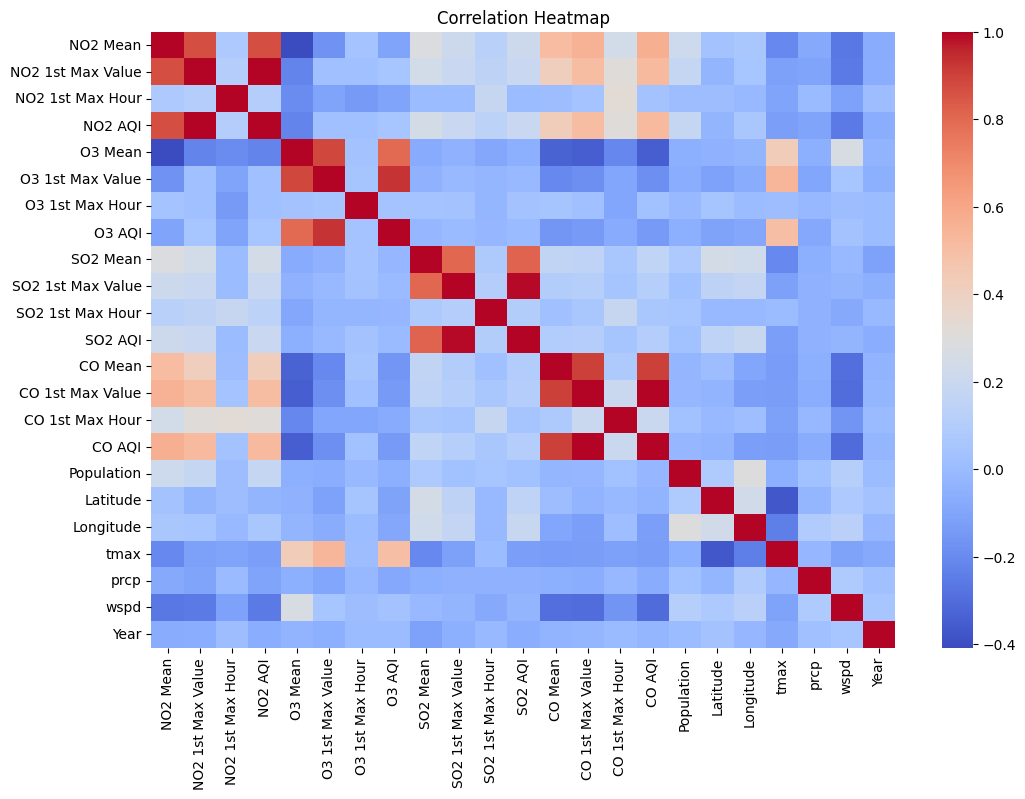


--- Top correlations with NO2 AQI ---
NO2 AQI              1.000000
NO2 1st Max Value    0.999244
NO2 Mean             0.869841
CO AQI               0.518749
CO 1st Max Value     0.510275
CO Mean              0.417194
CO 1st Max Hour      0.307466
SO2 Mean             0.242705
SO2 1st Max Value    0.194191
SO2 AQI              0.193565
Name: NO2 AQI, dtype: float64


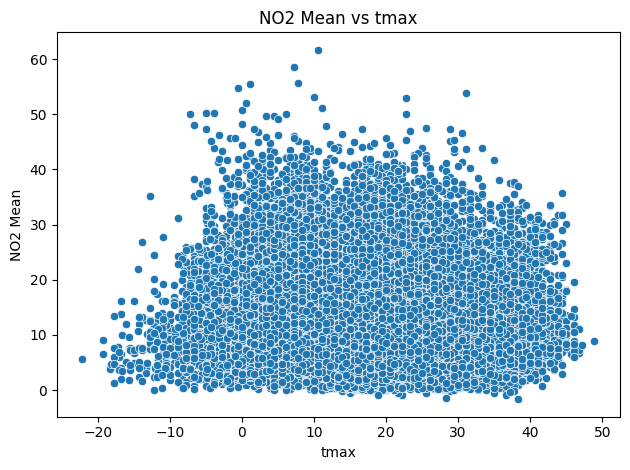

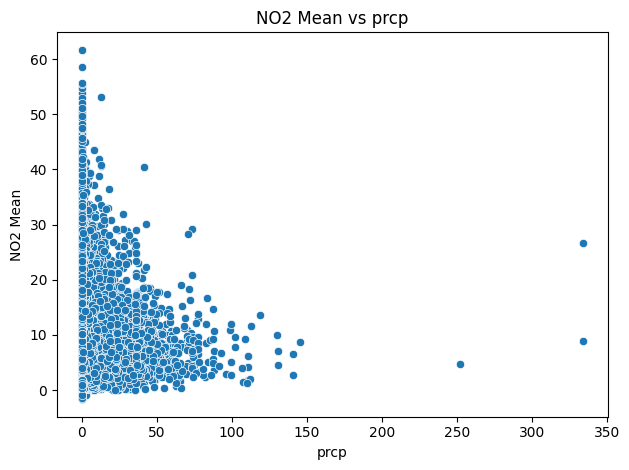

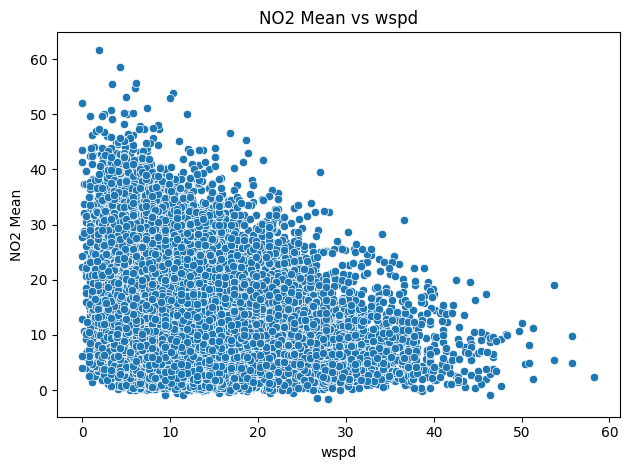

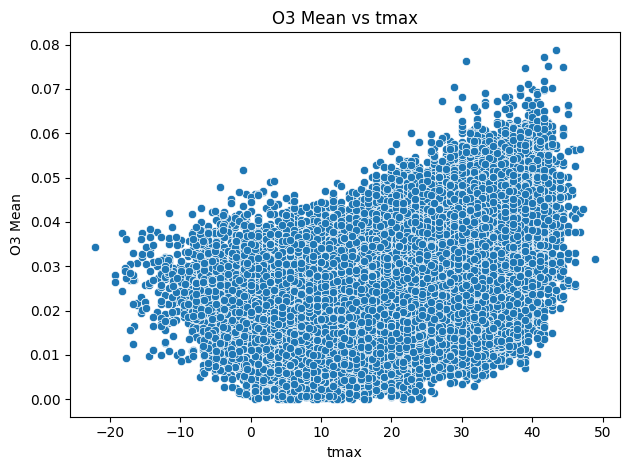

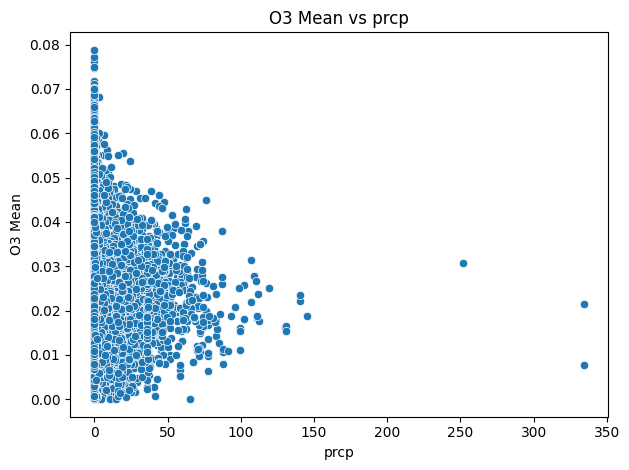

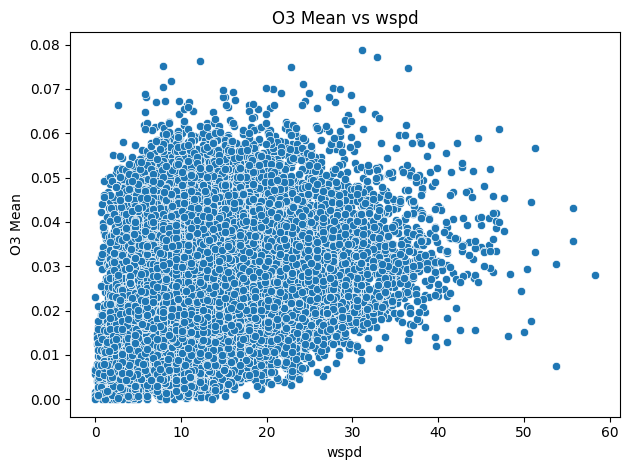

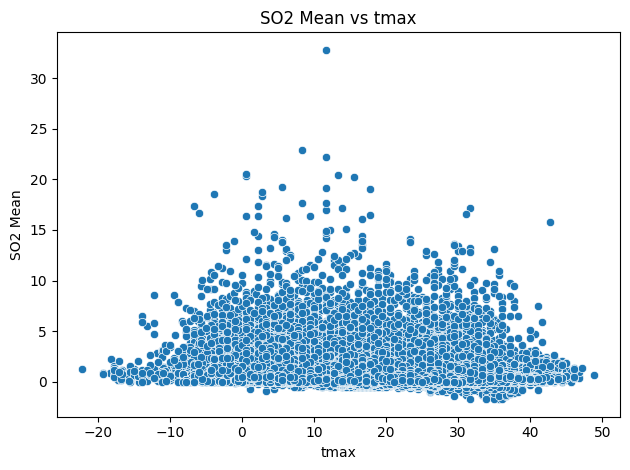

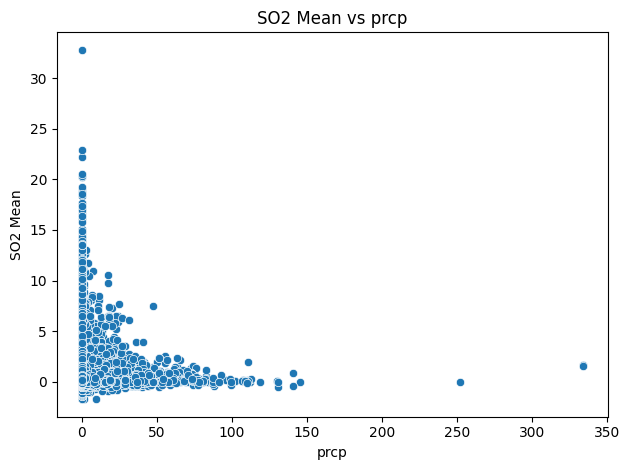

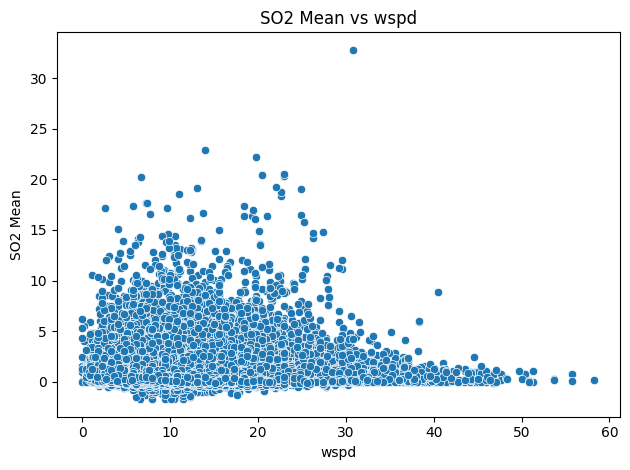

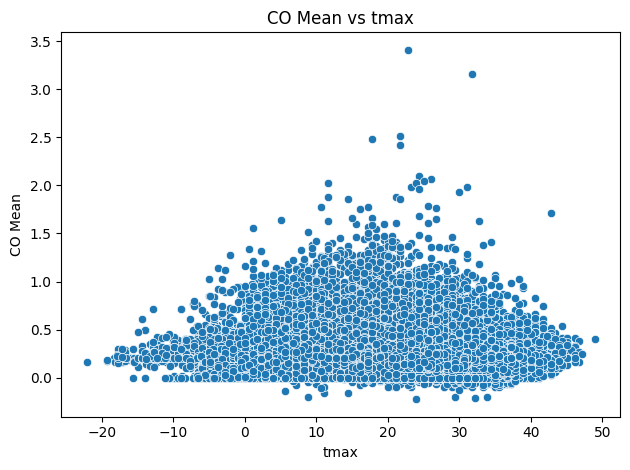

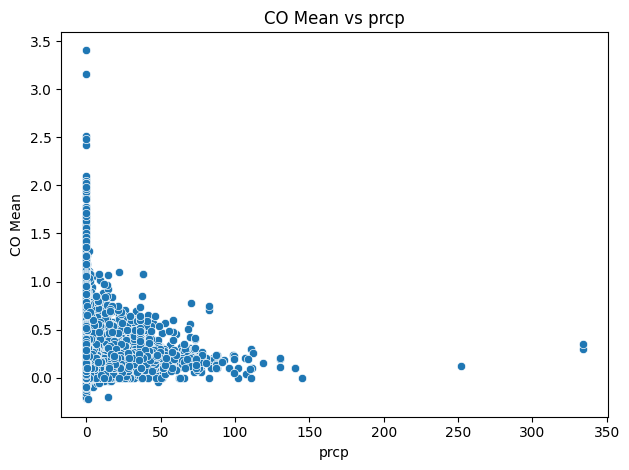

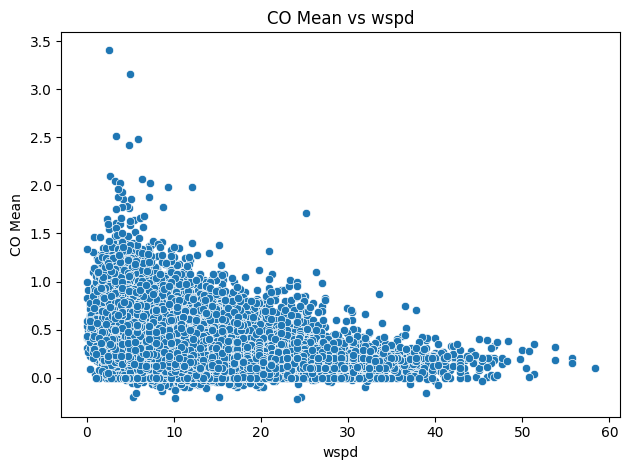

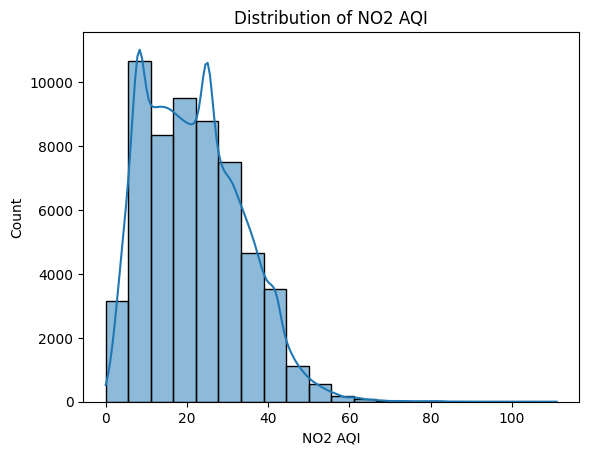

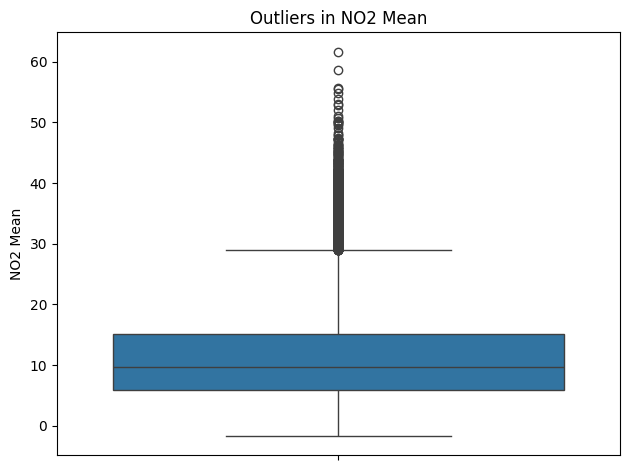

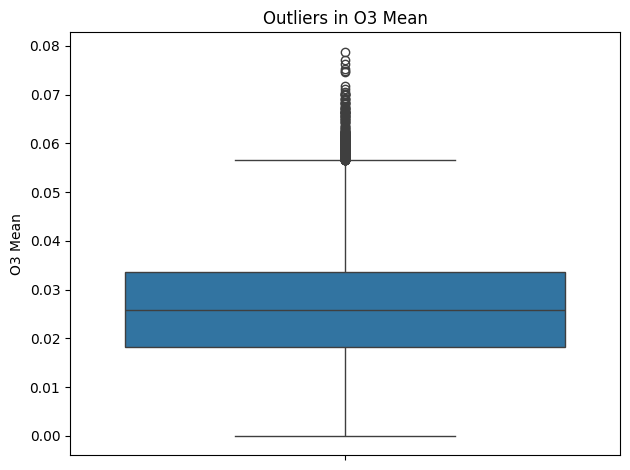

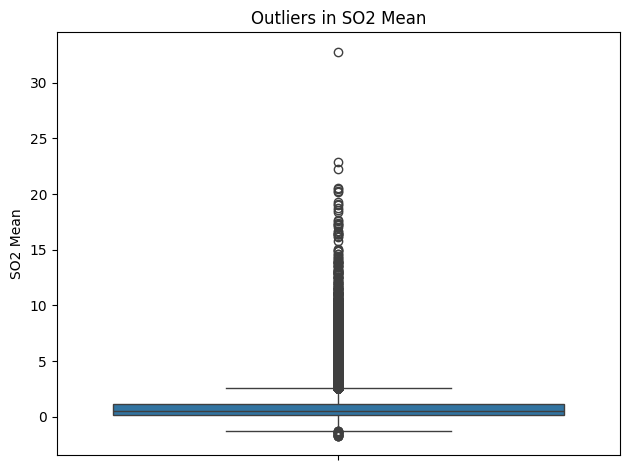

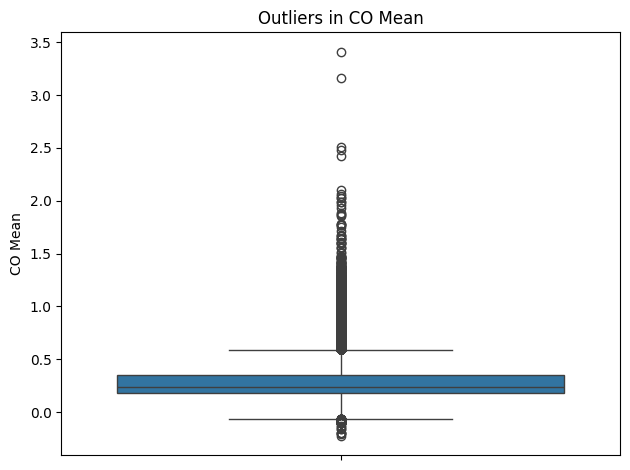

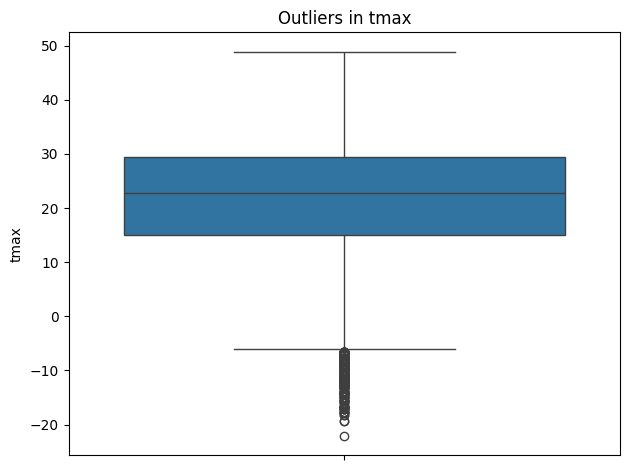

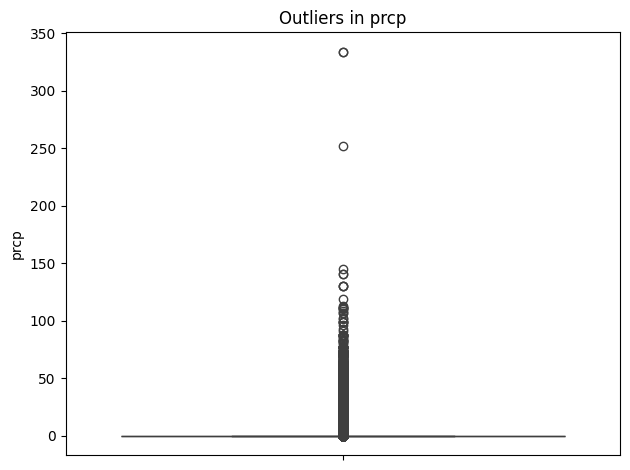

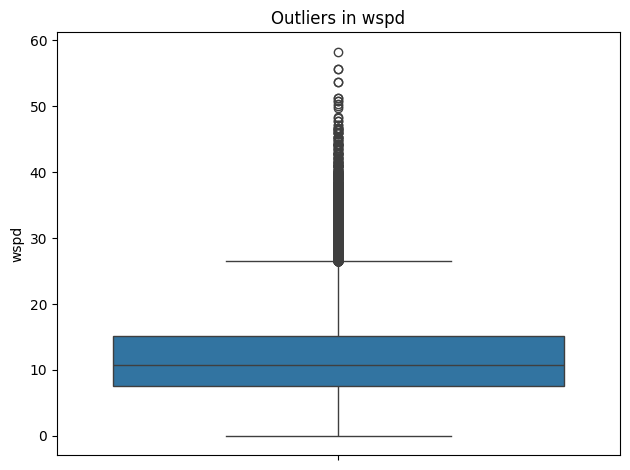

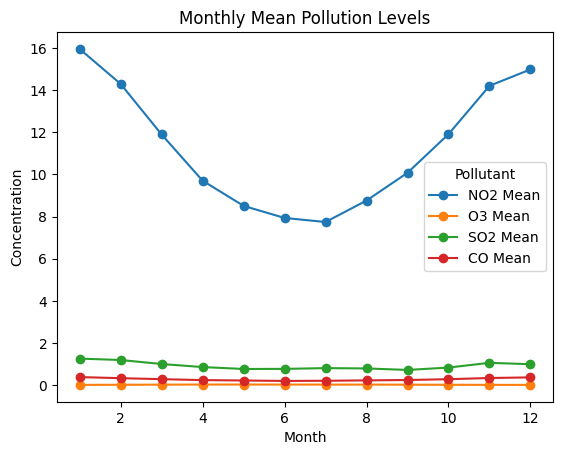

In [39]:
# ===============================
# 3. Basic overview
# ===============================
print("\n--- Basic Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isna().sum())

print("\n--- Descriptive Statistics ---")
print(df.describe().T)

# ===============================
# 4. Time-based trends
# ===============================
pollutants = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
for p in pollutants:
    plt.figure()
    sns.lineplot(data=df, x='Date Local', y=p, label=p)
    plt.title(f'{p} over Time')
    plt.xlabel('Date')
    plt.ylabel(p)
    plt.tight_layout()
    plt.show()

# ===============================
# 5. Correlation Analysis
# ===============================
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Find top correlated variables with AQI
if 'NO2 AQI' in df.columns:
    print("\n--- Top correlations with NO2 AQI ---")
    print(corr['NO2 AQI'].sort_values(ascending=False).head(10))

# ===============================
# 6. Pollution vs Weather
# ===============================
weather_vars = ['tmax', 'prcp', 'wspd']

for p in pollutants:
    for w in weather_vars:
        plt.figure()
        sns.scatterplot(data=df, x=w, y=p)
        plt.title(f'{p} vs {w}')
        plt.tight_layout()
        plt.show()

# ===============================
# 7. AQI Distribution
# ===============================
plt.figure()
sns.histplot(df['NO2 AQI'], kde=True, bins=20)
plt.title('Distribution of NO2 AQI')
plt.xlabel('NO2 AQI')
plt.show()

# ===============================
# 8. Outlier Detection (Boxplots)
# ===============================
for p in pollutants + weather_vars:
    plt.figure()
    sns.boxplot(data=df, y=p)
    plt.title(f'Outliers in {p}')
    plt.tight_layout()
    plt.show()

# ===============================
# 9. Optional: Daily/Monthly Aggregation
# ===============================
df['Month'] = df['Date Local'].dt.month
monthly_mean = df.groupby('Month')[pollutants].mean()

monthly_mean.plot(marker='o')
plt.title('Monthly Mean Pollution Levels')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend(title='Pollutant')
plt.show()

(On this process you can see that How pollutants vary over time (e.g., spikes, trends)

Which pollutants correlate with temperature or wind speed

How weather affects air quality

Which variables show outliers or anomalies

Correlation patterns — e.g., high NO₂ AQI might correlate with low wind speeds)

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.